In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

In [2]:
#dev on the fly
os.chdir('C:\\Users\matus\pysource\portfolio_swissknife')

In [3]:
# !pip install .

In [4]:
from portfolio_swissknife import portfolio as ps
from portfolio_swissknife import risk_model as rm

## 1. Loading Data and Setup
First we load our universe -- in this case some custom data that is stored locally. We process the data and create a `Portfolio` object that serves as a corpus for our universe.

In [5]:
#loading ext. data -- close prices of SPX
universe = pd.read_csv('ext_data/00_db_SPX__PX_LAST.csv', index_col = 0, parse_dates = True)
universe = universe[::-1].loc[:,universe.notna().all(axis=0)]
securities = [universe.columns[i].split(' ')[0] for i, _ in enumerate(universe.columns)]
universe = universe.loc['2014':]

In [6]:
port_universe = ps.Portfolio(securities)
port_universe.set_custom_prices(universe, 'daily')

Then a risk model is specified and created using the familiar `RiskModel` object and prices are loaded. To construct a portfolio using a nonparametric sort we call the method `.rolling_factor_selection` that conducts and out-of-sample rolling estimation of all of the betas in our prespecified risk model. 


In [7]:
factors = ['SPY', 'VLUE', 'SIZE', 'QUAL', 'MTUM', 'USMV']
rm_universe = rm.RiskModel(port_universe, factors)
rm_universe.get_prices('daily')

[*********************100%***********************]  6 of 6 completed


In [8]:
rm_universe.rolling_factor_selection(10, 'linear', int(2*252), 22)

To simulate the strategy historically, we create the `FactorPotfolio` class inputting the universe `Portfolio` and `RiskModel` objects. We select the risk factor we would like to sort on, load our benchmark and discount rates and we are ready to backtest in the same way as we would backtest a portfolio with static assets.

In [9]:
factor_pf_vlue = ps.FactorPortfolio(port_universe, rm_universe, 'VLUE')
factor_pf_vlue.set_constraints(default = True)
factor_pf_vlue.set_benchmark('SPY')
factor_pf_vlue.set_discount('^TNX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
factor_pf_vlue.historical_backtest(models=['EW','GMV','RP','MES'],frequency=22, estimation_period=int(2*252))

C:\Users\matus\anaconda3\envs\dev01\lib\site-packages\portfolio_swissknife\metrics.py:98: RuntimeWarning: invalid value encountered in sqrt
  var = np.sqrt((nu_fit - 2) / nu_fit) * t.ppf(1 - alpha, nu_fit) * sig_fit_norm - mu_fit_norm


,EW,GMV,RP,MES
Average Returns,21.20%,7.79%,15.06%,10.67%
CAGR,18.79%,5.96%,13.30%,8.97%
Volatility,46.04%,27.92%,38.81%,32.66%
Max DD,46.43%,35.74%,36.86%,35.74%
Skewness,0.52,-0.15,0.35,-0.23
Kurtosis,-2.99,-3.00,-2.99,-3.00
Sharpe Ratio,0.42,0.21,0.34,0.27
Sortino Ratio,0.83,0.35,0.72,0.51
Calmar Ratio,-0.46,-0.22,-0.41,-0.30
Pain Ratio,406.54,158.44,326.29,228.66


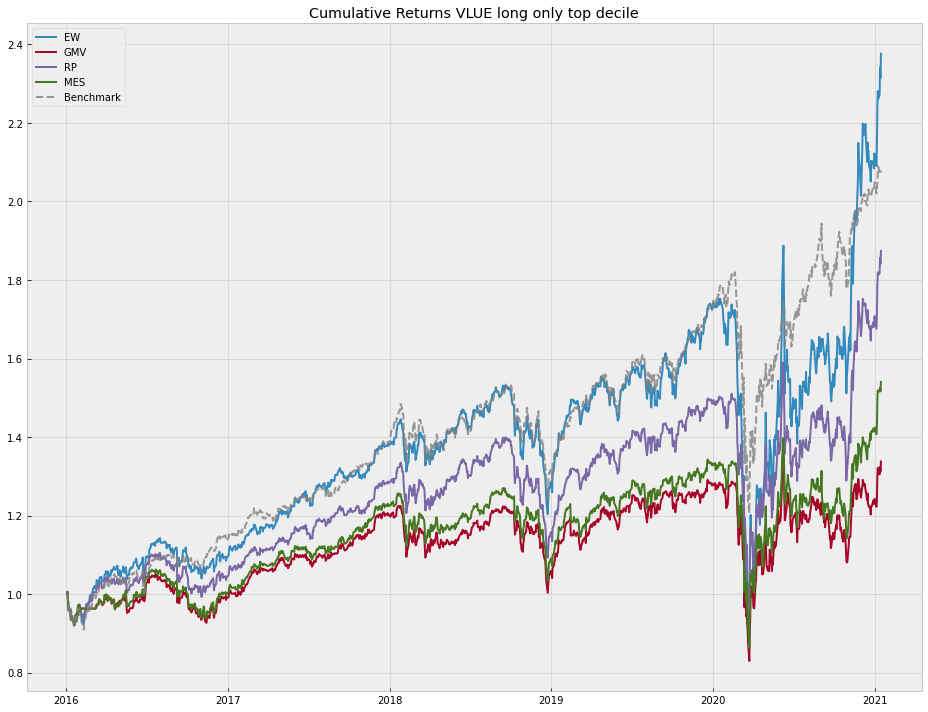

In [11]:
factor_pf_vlue.get_backtest_report(display_weights = False, title = 'VLUE long only top decile')

In [12]:
factor_pf_mtum = ps.FactorPortfolio(port_universe, rm_universe, 'MTUM')
factor_pf_mtum.set_constraints(default = True)
factor_pf_mtum.set_benchmark('SPY')
factor_pf_mtum.set_discount('^TNX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
factor_pf_mtum.historical_backtest(models=['EW','GMV','RP','MES'],frequency=22, estimation_period=int(2*252))

,EW,GMV,RP,MES
Average Returns,13.86%,10.27%,11.16%,10.08%
CAGR,12.52%,8.98%,9.94%,8.76%
Volatility,37.24%,32.06%,33.40%,31.75%
Max DD,33.55%,37.83%,34.00%,37.87%
Skewness,-0.72,-1.00,-0.87,-1.01
Kurtosis,-2.99,-2.98,-2.99,-2.98
Sharpe Ratio,0.32,0.26,0.27,0.25
Sortino Ratio,0.67,0.51,0.57,0.50
Calmar Ratio,-0.41,-0.27,-0.33,-0.27
Pain Ratio,366.31,213.22,248.28,210.41


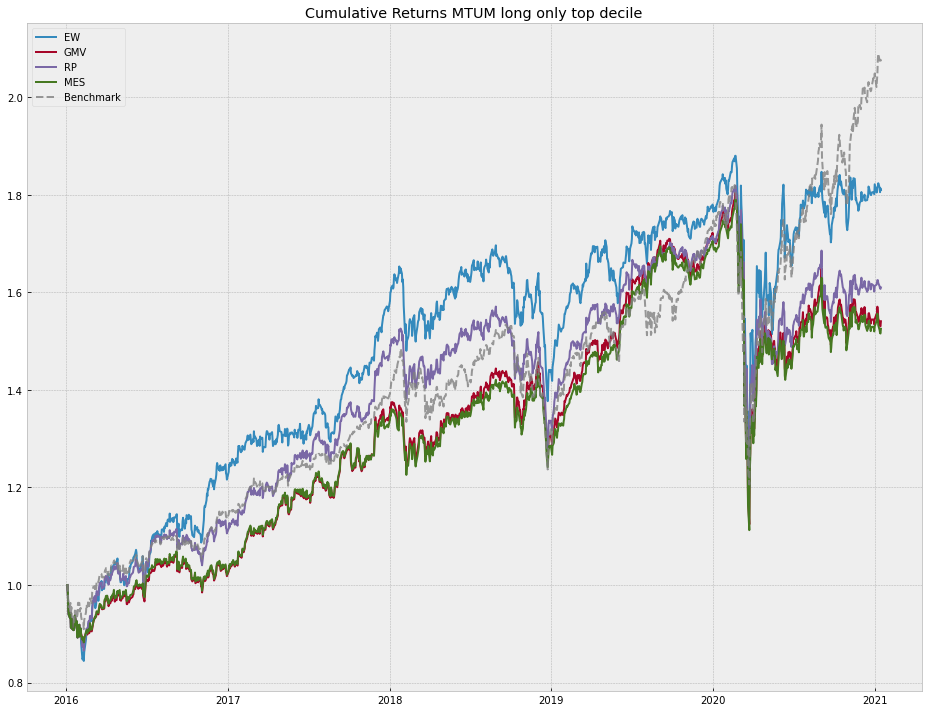

In [14]:
factor_pf_mtum.get_backtest_report(display_weights = False, title = 'MTUM long only top decile')